In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import io
from keras.layers import CuDNNLSTM
import tensorflow as tf

In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/heatwave/tempdata.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407550 entries, 0 to 407549
Data columns (total 92 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Curr Grid Day 0     407550 non-null  float64
 1   Grid -2,0 Day 0     407550 non-null  float64
 2   Grid -1,-1 Day 0    407550 non-null  float64
 3   Grid  -1,0 Day 0    407550 non-null  float64
 4   Grid -1,1 Day 0     407550 non-null  float64
 5   Grid 0,-2 Day 0     407550 non-null  float64
 6   Grid 0,-1 Day 0     407550 non-null  float64
 7   Grid 0,1 Day 0      407550 non-null  float64
 8   Grid 0,2 Day 0      407550 non-null  float64
 9   Grid 1,-1 Day 0     407550 non-null  float64
 10  Grid 1,0 Day 0      407550 non-null  float64
 11  Grid 1,1 Day 0      407550 non-null  float64
 12  Grid 2,0 Day 0      407550 non-null  float64
 13  Curr Grid Day -1    407550 non-null  float64
 14  Grid -2,0 Day -1    407550 non-null  float64
 15  Grid -1,-1 Day -1   407550 non-nul

In [ ]:
df.shape

(407550, 92)

In [ ]:
df.columns

Index(['Curr Grid Day 0', 'Grid -2,0 Day 0', 'Grid -1,-1 Day 0',
       'Grid  -1,0 Day 0', 'Grid -1,1 Day 0', 'Grid 0,-2 Day 0',
       'Grid 0,-1 Day 0', 'Grid 0,1 Day 0', 'Grid 0,2 Day 0',
       'Grid 1,-1 Day 0', 'Grid 1,0 Day 0', 'Grid 1,1 Day 0', 'Grid 2,0 Day 0',
       'Curr Grid Day -1', 'Grid -2,0 Day -1', 'Grid -1,-1 Day -1',
       'Grid  -1,0 Day -1', 'Grid -1,1 Day -1', 'Grid 0,-2 Day -1',
       'Grid 0,-1 Day -1', 'Grid 0,1 Day -1', 'Grid 0,2 Day -1',
       'Grid 1,-1 Day -1', 'Grid 1,0 Day -1', 'Grid 1,1 Day -1',
       'Grid 2,0 Day -1', 'Curr Grid Day -2', 'Grid -2,0 Day -2',
       'Grid -1,-1 Day -2', 'Grid  -1,0 Day -2', 'Grid -1,1 Day -2',
       'Grid 0,-2 Day -2', 'Grid 0,-1 Day -2', 'Grid 0,1 Day -2',
       'Grid 0,2 Day -2', 'Grid 1,-1 Day -2', 'Grid 1,0 Day -2',
       'Grid 1,1 Day -2', 'Grid 2,0 Day -2', 'Curr Grid Day -3',
       'Grid -2,0 Day -3', 'Grid -1,-1 Day -3', 'Grid  -1,0 Day -3',
       'Grid -1,1 Day -3', 'Grid 0,-2 Day -3', 'Grid 0,-1 Day 

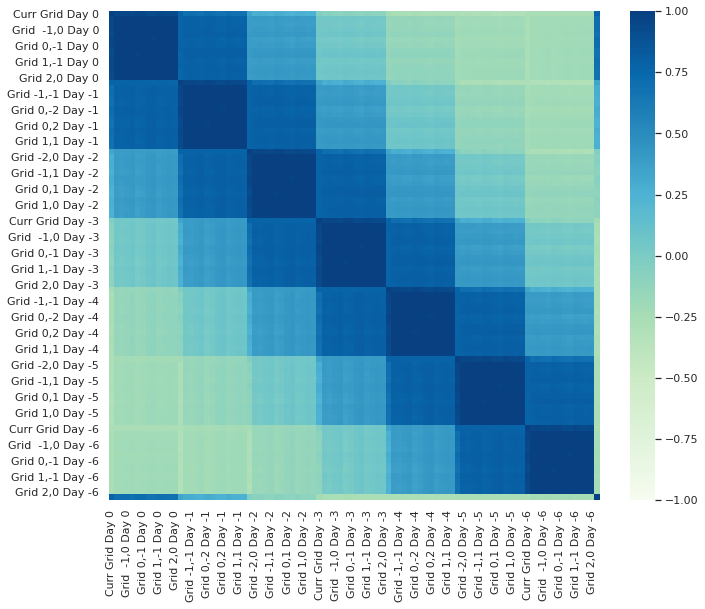

In [ ]:
sns.set(rc={'figure.figsize': (11,9)})
sns.heatmap(df.corr(),vmin=-1.0,vmax=1.0,cmap='GnBu')

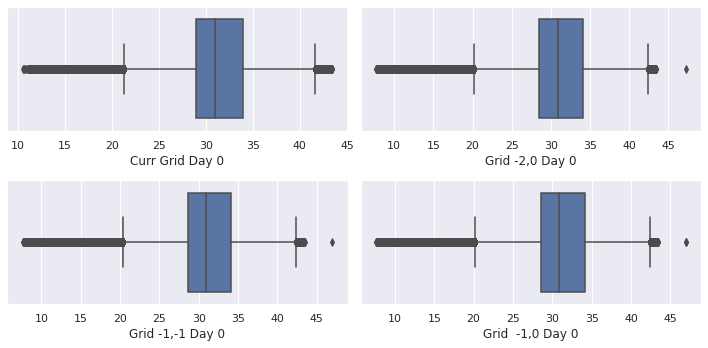

In [ ]:
fig,ax = plt.subplots(2,2, figsize=(10,5))                
sns.boxplot(df['Curr Grid Day 0'], ax = ax[0,0]) 
sns.boxplot(df['Grid -2,0 Day 0'], ax = ax[0,1]) 
sns.boxplot(df['Grid -1,-1 Day 0'], ax = ax[1,0]) 
sns.boxplot(df['Grid  -1,0 Day 0'], ax = ax[1,1]) 
plt.tight_layout()
plt.show()

In [ ]:
train = df.iloc[0:61259]

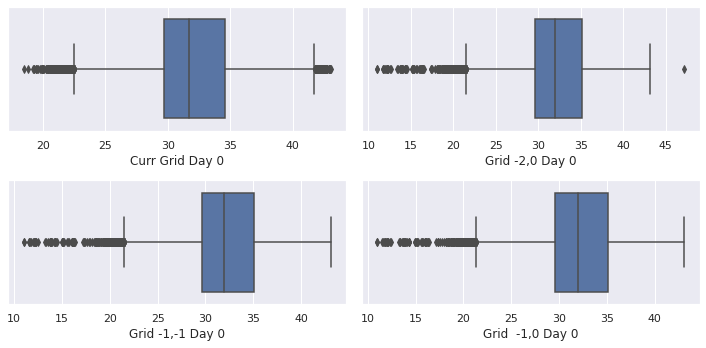

In [ ]:
fig,ax = plt.subplots(2,2, figsize=(10,5))                
sns.boxplot(train['Curr Grid Day 0'], ax = ax[0,0]) 
sns.boxplot(train['Grid -2,0 Day 0'], ax = ax[0,1]) 
sns.boxplot(train['Grid -1,-1 Day 0'], ax = ax[1,0]) 
sns.boxplot(train['Grid  -1,0 Day 0'], ax = ax[1,1]) 
plt.tight_layout()
plt.show()

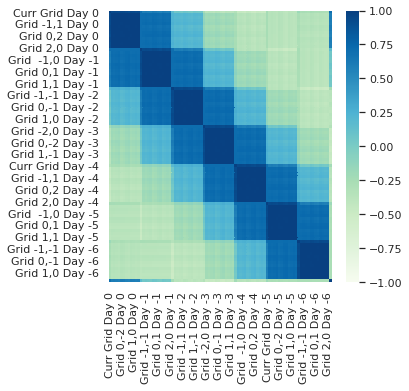

In [ ]:
sns.set(rc={'figure.figsize': (5,5)})
sns.heatmap(train.corr(),vmin=-1.0,vmax=1.0,cmap='GnBu')


In [ ]:
y_part = np.array([(df['Curr Grid Tomorrow'])]).T
y_part

array([[30.4153225 ],
       [33.24866676],
       [34.88225786],
       ...,
       [28.36549997],
       [26.13822574],
       [24.88499998]])

In [ ]:
ytrain = y_part[0:61259]
ytrain.shape
ytrain


array([[30.4153225 ],
       [33.24866676],
       [34.88225786],
       ...,
       [30.79806454],
       [30.25058346],
       [29.33120963]])

In [ ]:
x_part = df.loc[:,df.columns!='Curr Grid Tomorrow']
x_part = pd.DataFrame(x_part)

In [ ]:
x_part

,Curr Grid Day 0,"Grid -2,0 Day 0","Grid -1,-1 Day 0","Grid -1,0 Day 0","Grid -1,1 Day 0","Grid 0,-2 Day 0","Grid 0,-1 Day 0","Grid 0,1 Day 0","Grid 0,2 Day 0","Grid 1,-1 Day 0","Grid 1,0 Day 0","Grid 1,1 Day 0","Grid 2,0 Day 0",Curr Grid Day -1,"Grid -2,0 Day -1","Grid -1,-1 Day -1","Grid -1,0 Day -1","Grid -1,1 Day -1","Grid 0,-2 Day -1","Grid 0,-1 Day -1","Grid 0,1 Day -1","Grid 0,2 Day -1","Grid 1,-1 Day -1","Grid 1,0 Day -1","Grid 1,1 Day -1","Grid 2,0 Day -1",Curr Grid Day -2,"Grid -2,0 Day -2","Grid -1,-1 Day -2","Grid -1,0 Day -2","Grid -1,1 Day -2","Grid 0,-2 Day -2","Grid 0,-1 Day -2","Grid 0,1 Day -2","Grid 0,2 Day -2","Grid 1,-1 Day -2","Grid 1,0 Day -2","Grid 1,1 Day -2","Grid 2,0 Day -2",Curr Grid Day -3,...,"Grid 2,0 Day -3",Curr Grid Day -4,"Grid -2,0 Day -4","Grid -1,-1 Day -4","Grid -1,0 Day -4","Grid -1,1 Day -4","Grid 0,-2 Day -4","Grid 0,-1 Day -4","Grid 0,1 Day -4","Grid 0,2 Day -4","Grid 1,-1 Day -4","Grid 1,0 Day -4","Grid 1,1 Day -4","Grid 2,0 Day -4",Curr Grid Day -5,"Grid -2,0 Day -5","Grid -1,-1 Day -5","Grid -1,0 Day -5","Grid -1,1 Day -5","Grid 0,-2 Day -5","Grid 0,-1 Day -5","Grid 0,1 Day -5","Grid 0,2 Day -5","Grid 1,-1 Day -5","Grid 1,0 Day -5","Grid 1,1 Day -5","Grid 2,0 Day -5",Curr Grid Day -6,"Grid -2,0 Day -6","Grid -1,-1 Day -6","Grid -1,0 Day -6","Grid -1,1 Day -6","Grid 0,-2 Day -6","Grid 0,-1 Day -6","Grid 0,1 Day -6","Grid 0,2 Day -6","Grid 1,-1 Day -6","Grid 1,0 Day -6","Grid 1,1 Day -6","Grid 2,0 Day -6"
0,32.683790,33.772803,33.507742,33.810766,34.113790,33.503898,33.535323,34.162137,34.475544,33.562903,33.886694,34.210484,33.921351,34.378000,34.852542,34.731000,35.012083,35.293167,34.832875,34.896000,35.447250,35.722875,35.061000,35.331167,35.601333,35.423646,34.849113,35.376734,35.352742,35.632500,35.912258,35.518898,35.630242,36.146290,36.404314,35.907742,36.144032,36.380323,36.265544,32.385583,...,33.261104,32.038226,31.886714,32.109032,31.999798,31.890564,32.183616,32.242258,31.983508,31.854133,32.375484,32.225968,32.076452,32.204214,28.830536,28.616429,28.883036,28.677679,28.472321,28.953036,28.969375,28.508482,28.278036,29.055714,28.800178,28.544643,28.746451,26.738548,26.119577,26.445323,26.149153,25.852984,26.513750,26.501210,25.856250,25.533770,26.557097,26.208306,25.859516,26.126754
1,30.415323,30.872238,30.725484,30.917379,31.109274,30.753548,30.767742,31.157298,31.352077,30.810000,31.007661,31.205323,31.011875,32.683790,33.772803,33.507742,33.810766,34.113790,33.503898,33.535323,34.162137,34.475544,33.562903,33.886694,34.210484,33.921351,34.378000,34.852542,34.731000,35.012083,35.293167,34.832875,34.896000,35.447250,35.722875,35.061000,35.331167,35.601333,35.423646,34.849113,...,36.265544,32.385583,32.674042,32.716667,32.857583,32.998500,32.795056,32.913500,33.168750,33.296375,33.110333,33.224667,33.339000,33.261104,32.038226,31.886714,32.109032,31.999798,31.890564,32.183616,32.242258,31.983508,31.854133,32.375484,32.225968,32.076452,32.204214,28.830536,28.616429,28.883036,28.677679,28.472321,28.953036,28.969375,28.508482,28.278036,29.055714,28.800178,28.544643,28.746451
2,33.248667,33.703312,33.601000,33.811458,34.021917,33.697222,33.717166,34.122041,34.324479,33.833333,34.027750,34.222166,34.073083,30.415323,30.872238,30.725484,30.917379,31.109274,30.753548,30.767742,31.157298,31.352077,30.810000,31.007661,31.205323,31.011875,32.683790,33.772803,33.507742,33.810766,34.113790,33.503898,33.535323,34.162137,34.475544,33.562903,33.886694,34.210484,33.921351,34.378000,...,35.423646,34.849113,35.376734,35.352742,35.632500,35.912258,35.518898,35.630242,36.146290,36.404314,35.907742,36.144032,36.380323,36.265544,32.385583,32.674042,32.716667,32.857583,32.998500,32.795056,32.913500,33.168750,33.296375,33.110333,33.224667,33.339000,33.261104,32.038226,31.886714,32.109032,31.999798,31.890564,32.183616,32.242258,31.983508,31.854133,32.375484,32.225968,32.076452,32.204214
3,34.882258,35.617661,35.600968,35.697661,35.794355,35.653938,35.688710,35.866613,35.955565,35.776451,35.8576

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_part_norm = pd.DataFrame(scaler.fit_transform(x_part))
x_part_norm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
0,0.283748,0.520405,0.466036,0.528167,0.589053,0.464149,0.471545,0.598907,0.660717,0.477270,0.543700,0.608819,0.550940,0.651076,0.720603,0.698624,0.752149,0.804817,0.722527,0.731523,0.834946,0.885462,0.764673,0.815271,0.865179,0.833710,0.732466,0.802406,0.801431,0.852500,0.902855,0.839928,0.856443,0.948054,0.993017,0.911713,0.952704,0.993381,0.976561,0.173754,...,0.376365,0.093767,0.102563,0.140490,0.125622,0.111862,0.149289,0.167336,0.130854,0.114509,0.194226,0.171201,0.149690,0.167347,-0.617728,-0.538507,-0.501391,-0.524080,-0.545683,-0.503954,-0.482642,-0.536230,-0.560976,-0.464124,-0.496469,-0.527222,-0.505753,-1.062018,-1.008263,-0.967030,-0.998838,-1.029477,-0.977692,-0.953400,-1.025219,-1.058861,-0.940205,-0.981771,-1.021627,-0.995689
1,-0.230240,-0.061487,-0.100299,-0.050895,-0.002572,-0.104653,-0.090703,0.008469,0.056626,-0.081165,-0.030445,0.019279,-0.028668,0.267830,0.504163,0.449822,0.511885,0.572711,0.447899,0.455277,0.582536,0.644306,0.460944,0.527332,0.592417,0.534526,0.626892,0.698163,0.675995,0.729394,0.781952,0.699328,0.708570,0.811803,0.862251,0.741404,0.791924,0.841768,0.810185,0.724134,...,0.968220,0.171273,0.258394,0.262491,0.294996,0.327158,0.273997,0.301853,0.360694,0.389842,0.341279,0.367718,0.394131,0.375107,0.096112,0.106145,0.143788,0.129198,0.115718,0.152447,0.170629,0.134720,0.118663,0.197518,0.174787,0.153571,0.171058,-0.600765,-0.520961,-0.484336,-0.506595,-0.527778,-0.486975,-0.465679,-0.518343,-0.542654,-0.447247,-0.479083,-0.509346,-0.488179
2,0.411737,0.506464,0.485019,0.528305,0.570962,0.504131,0.508488,0.591029,0.631500,0.532127,0.571830,0.611111,0.581167,-0.245318,-0.077273,-0.116067,-0.066795,-0.018590,-0.120450,-0.106600,-0.007646,0.040423,-0.097189,-0.046569,0.003068,-0.044898,0.247229,0.483442,0.429203,0.491022,0.551632,0.426956,0.434535,0.561319,0.622893,0.440086,0.506216,0.571070,0.513301,0.618882,...,0.802371,0.720968,0.793321,0.791767,0.842919,0.893365,0.829544,0.846289,0.938091,0.983167,0.901077,0.942169,0.982959,0.965710,0.173413,0.261346,0.265311,0.297877,0.330094,0.276682,0.304610,0.363564,0.392762,0.343977,0.370474,0.396941,0.377930,0.106485,0.117289,0.154447,0.140142,0.126942,0.162929,0.181058,0.145779,0.130024,0.207718,0.185341,0.164469,0.181689
3,0.781875,0.890508,0.892116,0.905796,0.919976,0.908801,0.909017,0.933830,0.946959,0.926295,0.936756,0.947887,0.942259,0.395610,0.490233,0.468790,0.512023,0.554630,0.487848,0.492195,0.574661,0.615100,0.515772,0.555450,0.594708,0.564744,-0.261122,-0.093375,-0.132117,-0.083098,-0.035121,-0.136726,-0.122844,-0.024361,0.023510,-0.113616,-0.063239,-0.013819,-0.061671,0.240377,...,0.506429,0.615847,0.689571,0.666932,0.720414,0.773062,0.689625,0.699146,0.802535,0.853076,0.731633,0.782220,0.832139,0.800212,0.721647,0.794112,0.792509,0.843550,0.893882,0.830122,0.846875,0.938460,0.983428,0.901511,0.942500,0.983187,0.966010,0.183073,0.270949,0.274765,0.307132,0.339152,0.285933,0.313699,0.372294,0.401315,0.352698,0.379037,0.405344,0.386439
4,0.376315,0.351006,0.395388,0.359877,0.326233,0.406981,0.407621,0.331654,0.296573,0.420017,0.377409,0.337020,0.369104,0.765144,0.873976,0.875568,0.889265,0.903452,0.892196,0.892460,0.917314,0.930449,0.909726,0.920221,0.931374,0.925721,0.373815,0.469623,0.448017,0.491160,0.533690,0.466577,0.471158,0.553504,0.593904,0.494479,0.534116,0.573343,0.543286,-0.266423,...,-0.066719,0.237813,0.475865,0.421325,0.483207,0.543883,0.418570,0.426466,0.553329,0.614953,0.431844,0.497987,0.562858,0.504896,0.616806,0.690781,0.668164,0.721548,0.774093,0.690733,0.700319,0.803491,0.853920,0.732752,0.783226,0.833029,0.801219,0.726246,0.798424,0.796737,0.847341,0.897244,0.833895,0.850540,0.941341,0.985930,0.904605,0.945241,0.985582,0.968485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
X_train = x_part_norm.iloc[0:61259] #48,000 for train  + validation
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
0,0.283748,0.520405,0.466036,0.528167,0.589053,0.464149,0.471545,0.598907,0.660717,0.477270,0.543700,0.608819,0.550940,0.651076,0.720603,0.698624,0.752149,0.804817,0.722527,0.731523,0.834946,0.885462,0.764673,0.815271,0.865179,0.833710,0.732466,0.802406,0.801431,0.852500,0.902855,0.839928,0.856443,0.948054,0.993017,0.911713,0.952704,0.993381,0.976561,0.173754,...,0.376365,0.093767,0.102563,0.140490,0.125622,0.111862,0.149289,0.167336,0.130854,0.114509,0.194226,0.171201,0.149690,0.167347,-0.617728,-0.538507,-0.501391,-0.524080,-0.545683,-0.503954,-0.482642,-0.536230,-0.560976,-0.464124,-0.496469,-0.527222,-0.505753,-1.062018,-1.008263,-0.967030,-0.998838,-1.029477,-0.977692,-0.953400,-1.025219,-1.058861,-0.940205,-0.981771,-1.021627,-0.995689
1,-0.230240,-0.061487,-0.100299,-0.050895,-0.002572,-0.104653,-0.090703,0.008469,0.056626,-0.081165,-0.030445,0.019279,-0.028668,0.267830,0.504163,0.449822,0.511885,0.572711,0.447899,0.455277,0.582536,0.644306,0.460944,0.527332,0.592417,0.534526,0.626892,0.698163,0.675995,0.729394,0.781952,0.699328,0.708570,0.811803,0.862251,0.741404,0.791924,0.841768,0.810185,0.724134,...,0.968220,0.171273,0.258394,0.262491,0.294996,0.327158,0.273997,0.301853,0.360694,0.389842,0.341279,0.367718,0.394131,0.375107,0.096112,0.106145,0.143788,0.129198,0.115718,0.152447,0.170629,0.134720,0.118663,0.197518,0.174787,0.153571,0.171058,-0.600765,-0.520961,-0.484336,-0.506595,-0.527778,-0.486975,-0.465679,-0.518343,-0.542654,-0.447247,-0.479083,-0.509346,-0.488179
2,0.411737,0.506464,0.485019,0.528305,0.570962,0.504131,0.508488,0.591029,0.631500,0.532127,0.571830,0.611111,0.581167,-0.245318,-0.077273,-0.116067,-0.066795,-0.018590,-0.120450,-0.106600,-0.007646,0.040423,-0.097189,-0.046569,0.003068,-0.044898,0.247229,0.483442,0.429203,0.491022,0.551632,0.426956,0.434535,0.561319,0.622893,0.440086,0.506216,0.571070,0.513301,0.618882,...,0.802371,0.720968,0.793321,0.791767,0.842919,0.893365,0.829544,0.846289,0.938091,0.983167,0.901077,0.942169,0.982959,0.965710,0.173413,0.261346,0.265311,0.297877,0.330094,0.276682,0.304610,0.363564,0.392762,0.343977,0.370474,0.396941,0.377930,0.106485,0.117289,0.154447,0.140142,0.126942,0.162929,0.181058,0.145779,0.130024,0.207718,0.185341,0.164469,0.181689
3,0.781875,0.890508,0.892116,0.905796,0.919976,0.908801,0.909017,0.933830,0.946959,0.926295,0.936756,0.947887,0.942259,0.395610,0.490233,0.468790,0.512023,0.554630,0.487848,0.492195,0.574661,0.615100,0.515772,0.555450,0.594708,0.564744,-0.261122,-0.093375,-0.132117,-0.083098,-0.035121,-0.136726,-0.122844,-0.024361,0.023510,-0.113616,-0.063239,-0.013819,-0.061671,0.240377,...,0.506429,0.615847,0.689571,0.666932,0.720414,0.773062,0.689625,0.699146,0.802535,0.853076,0.731633,0.782220,0.832139,0.800212,0.721647,0.794112,0.792509,0.843550,0.893882,0.830122,0.846875,0.938460,0.983428,0.901511,0.942500,0.983187,0.966010,0.183073,0.270949,0.274765,0.307132,0.339152,0.285933,0.313699,0.372294,0.401315,0.352698,0.379037,0.405344,0.386439
4,0.376315,0.351006,0.395388,0.359877,0.326233,0.406981,0.407621,0.331654,0.296573,0.420017,0.377409,0.337020,0.369104,0.765144,0.873976,0.875568,0.889265,0.903452,0.892196,0.892460,0.917314,0.930449,0.909726,0.920221,0.931374,0.925721,0.373815,0.469623,0.448017,0.491160,0.533690,0.466577,0.471158,0.553504,0.593904,0.494479,0.534116,0.573343,0.543286,-0.266423,...,-0.066719,0.237813,0.475865,0.421325,0.483207,0.543883,0.418570,0.426466,0.553329,0.614953,0.431844,0.497987,0.562858,0.504896,0.616806,0.690781,0.668164,0.721548,0.774093,0.690733,0.700319,0.803491,0.853920,0.732752,0.783226,0.833029,0.801219,0.726246,0.798424,0.796737,0.847341,0.897244,0.833895,0.850540,0.941341,0.985930,0.904605,0.945241,0.985582,0.968485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
X_test = x_part_norm.iloc[41259:61259] #20,000 for test.
X_test
y_part = pd.DataFrame(y_part)
Y_test = y_part.iloc[41259:61259]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X_train,ytrain,train_size=0.8)

In [ ]:
x_train_keras = np.array(x_train)
x_valid_keras = np.array(x_valid)
print("Dimensions of the Data after reshaping it to Keras Acceptable form:")
print(x_train_keras.shape)
print(x_valid_keras.shape)

Dimensions of the Data after reshaping it to Keras Acceptable form:
(49007, 91)
(12252, 91)


In [ ]:
X_test.shape
x_test_keras = np.array(X_test)

In [ ]:
# function for plotting difference between training and validation model loss
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Training and Validation model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, SimpleRNN
from keras.layers import Dense, Dropout, Activation, Flatten
from keras import optimizers

model = Sequential()
model.add(Dense(12, input_dim=91, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                1104      
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 1,217
Trainable params: 1,217
Non-trainable params: 0
_________________________________________________________________


In [ ]:

adam = tf.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='mean_squared_error',optimizer=adam,metrics=['mae'])

LSTM_history = model.fit(x_train_keras, y_train, epochs=70, batch_size=200, 
                    validation_data=(x_valid_keras, y_valid), verbose=2, shuffle=False)

Epoch 1/70
246/246 - 1s - loss: 739.1927 - mae: 25.8892 - val_loss: 411.2489 - val_mae: 17.4276
Epoch 2/70
246/246 - 0s - loss: 254.6776 - mae: 12.8075 - val_loss: 168.5150 - val_mae: 10.3342
Epoch 3/70
246/246 - 0s - loss: 135.5295 - mae: 9.0427 - val_loss: 115.1611 - val_mae: 8.1035
Epoch 4/70
246/246 - 0s - loss: 104.8970 - mae: 7.7447 - val_loss: 95.7547 - val_mae: 7.3773
Epoch 5/70
246/246 - 0s - loss: 86.9036 - mae: 7.0957 - val_loss: 78.9333 - val_mae: 6.8034
Epoch 6/70
246/246 - 0s - loss: 70.6597 - mae: 6.5021 - val_loss: 62.6912 - val_mae: 6.1672
Epoch 7/70
246/246 - 0s - loss: 54.7636 - mae: 5.8077 - val_loss: 48.1158 - val_mae: 5.4919
Epoch 8/70
246/246 - 0s - loss: 41.7979 - mae: 5.1454 - val_loss: 36.5487 - val_mae: 4.8385
Epoch 9/70
246/246 - 0s - loss: 33.1277 - mae: 4.6125 - val_loss: 30.0776 - val_mae: 4.3962
Epoch 10/70
246/246 - 0s - loss: 28.1746 - mae: 4.2508 - val_loss: 26.2950 - val_mae: 4.1055
Epoch 11/70
246/246 - 0s - loss: 25.0489 - mae: 4.0057 - val_loss: 2

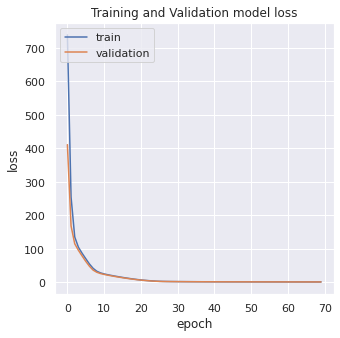

In [ ]:
plotLosses(LSTM_history)

In [ ]:
prediction = model.predict(x_test_keras)
prediction.shape

(20000, 1)

In [ ]:
Y_test.shape

(20000, 1)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
from sklearn import metrics
print(100-float(mean_absolute_percentage_error(Y_test,prediction)))
print(metrics.r2_score(Y_test, prediction))
print(mean_absolute_percentage_error(Y_test, prediction))

97.03589887131918
0.9106061429662586
0    2.964101
dtype: float64


In [ ]:
print(metrics.explained_variance_score(Y_test, prediction))
print(metrics.max_error(Y_test, prediction))
print(metrics.mean_absolute_error(Y_test, prediction))
print(metrics.mean_squared_error(Y_test, prediction))


0.9109522269204284
10.057011827345818
0.924603165498065
1.429015570708543
